<a href="https://colab.research.google.com/github/maxvell07/TelecomLabs/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Упражнение 2.1**
C помощью chap02.ipynb посмотреть примеры и пояснения.

# **Упражнение 2.2**
Пилообразный сигнал линейно нарастает от -1 до 1, а затем резко падает до -1 и повторяется. См. https://en.wikipedia.org/wiki/Sawtooth_wave

Напишите класс, называемый SawtoothSignal, расширяющий signal и предоставляющий evaluate для оценки пилообразного сигнала.

Вычислите спектр пилообразного сигнала. Как соотносится его гармоническая структура с треугольным и прямоугольным сигналами?

Импорт библиотек и файлов:

In [43]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import Sinusoid, unbias, normalize, TriangleSignal, SquareSignal


Напишем класс SawtoothSignal:

In [44]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):

    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

Создадим пилообразный сигнал:

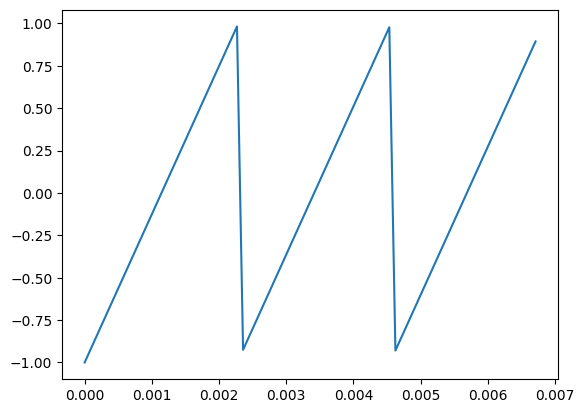

In [14]:
sawtooth_signal = SawtoothSignal()
sawtooth_signal.plot()
sawtooth_signal.make_wave().make_audio()

Вычислим спектр этого сигнала:

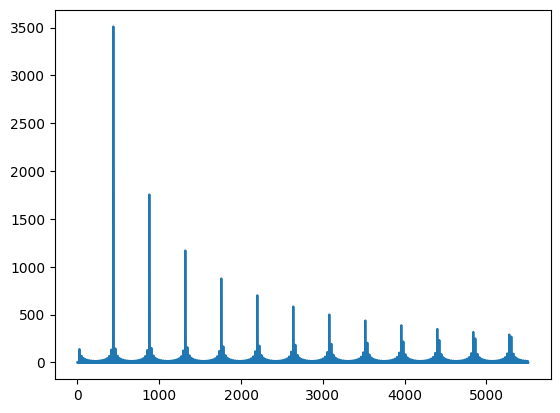

In [15]:
sawtooth_wave = sawtooth_signal.make_wave()
sawtooth_wave.make_spectrum().plot()

Для сравнения создал треугольный и прямоугольный сигнал:

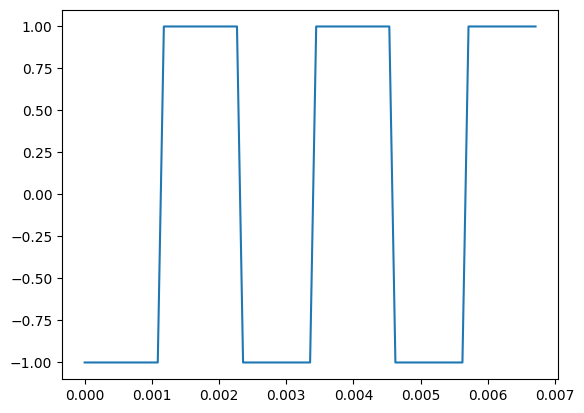

In [16]:
from thinkdsp import SquareSignal

square_signal = SquareSignal()
square_signal.plot()
square_signal.make_wave().make_audio()

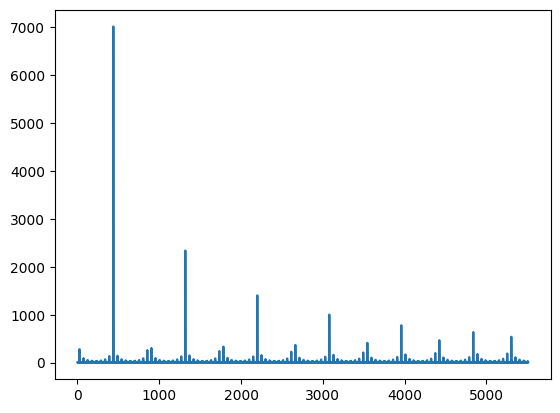

In [18]:
square_spectrum = square_signal.make_wave().make_spectrum()
square_spectrum.plot()

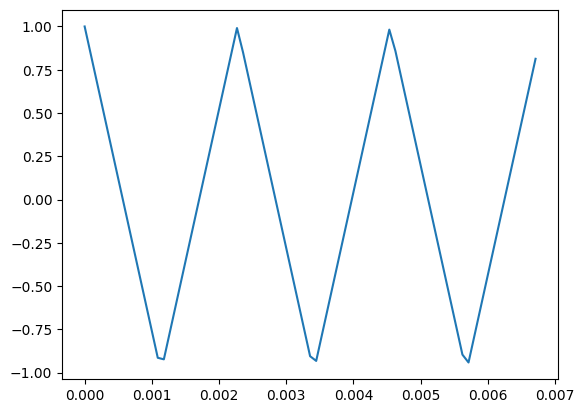

In [19]:
from thinkdsp import TriangleSignal

triangle_signal = TriangleSignal()
triangle_signal.plot()
triangle_signal.make_wave().make_audio()

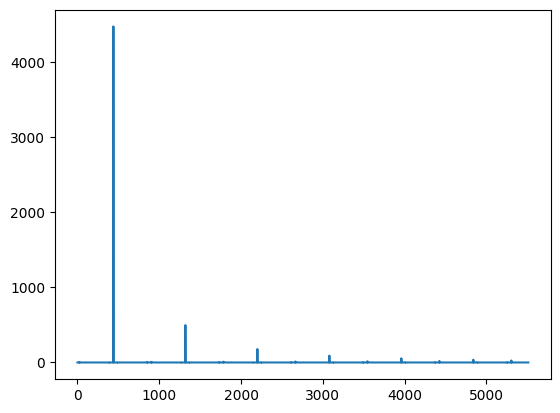

In [20]:
triangle_spectrum = triangle_signal.make_wave().make_spectrum()
triangle_spectrum.plot()

Если сравнивать спектры пилообразного и квадратного сигналов видим, что пилообразный сигнал включает в себя как чётные, так и нечётные гармоники.

А по сравнению с треугольной волной пилообразная спадает не так быстро и каждая последующая гаромника затухает в соотношении к предыдущей как 1/f^2, в то время как пилообразная затухает, как 1/f.

# **Упражнение 2.3**
Создайте прямоугольный сигнал 1100 Гц и вычислите wave с выборками 10 000 кадров в секунду. Постройте спектр и убедитесь, что большинство гармоник "завернуты" из-за биений. Слышны ли последствия этого при проигрывании?

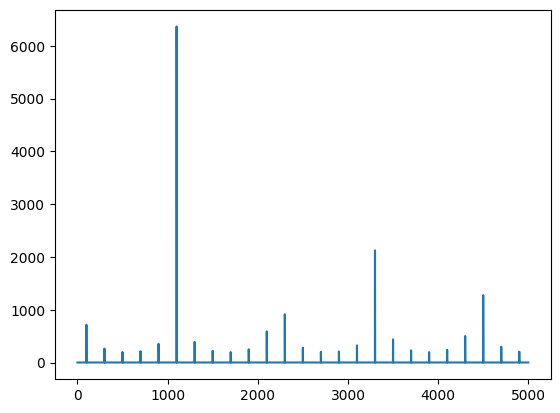

In [21]:
square_signal = SquareSignal(freq=1100)
square_wave = square_signal.make_wave(duration = 1, framerate = 10000)
square_spectrum = square_wave.make_spectrum()
square_spectrum.plot()

In [22]:
square_spectrum.peaks()[:5]

[(6367.182534102138, 1100.0),
 (2125.0234754609446, 3300.0),
 (1278.179301804898, 4500.0),
 (916.3945635352014, 2300.0),
 (716.3133230172565, 100.0)]

Видно частоту 1100 Гц, а также гармонику 3300 Гц, которые находятся на своих частотах. 3 гармоника должна быть на частоте 5500, но мы видим ее на частоте 4500, это связанно с заверткой на частоте 5000. 4 гармоника должна быть на частоте 7700, после 5500 частоты мы оказались на 4500. У нас осталось еще 7700 - 5500 = 2200, далее 4500 - 2200 = 2300. И видим, что четвертая гармоника находится на 2300. 5 гармоника из за биений оказалась на частоте 100 и стала основной, вместо 1100. Большинство гармоник "завёрнуты" из-за биений.

Можно услышать последствия:

In [23]:
square_wave.make_audio()

Попробуем увеличить выборку в 4 раза и послушать более приближенный звук, который должен получиться при прямоугольном сигнале в 1100 Гц:

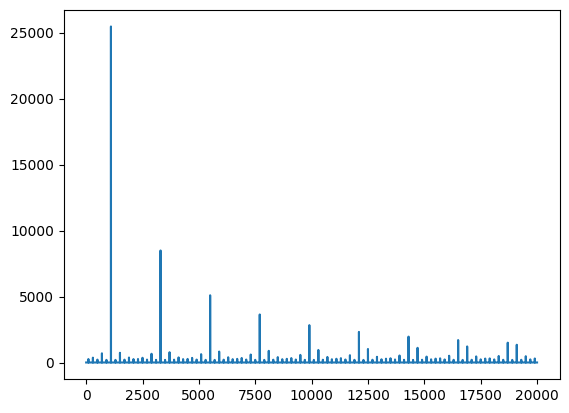

In [25]:
square_wave_x4 = square_signal.make_wave(duration = 1, framerate = 40000)
square_wave_x4.make_spectrum().plot()

Получим:

In [26]:
square_wave_x4.make_audio()

# **Упражнение 2.4**
Возьмите объект Spectrum и распечатайте несколько первых значений spectrum.fs. Убедитесь, что они начинаются с нуля, то есть Spectrum.hs[0] - амплитуда компоненты с частотой 0. Но что это значит?
Проведите такой эксперимент:
1. Создайте треугольный сигнал с частотой 440 Гц и wave длительностью 0,01 секунд. Распечатайте сигнал.
2. Создайте объект Spectrum и распечатайте Spectrum.hs[0]. Каковы амплитуда и фаза этого компонента?
3. Установите Spectrum.hs[0] = 100. Как эта операция повлияет на сигнал? Подсказка: Spectrum дает метод, называемый make_wave, вычисляющий wave, соответствующий Spectrum.

Выполним действия, описанные в первом пункте:

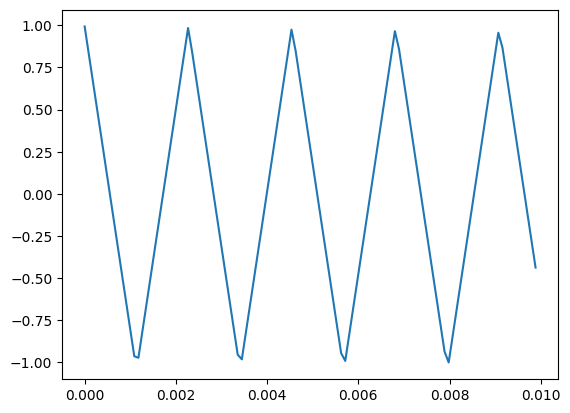

In [27]:
triangle_signal = TriangleSignal(freq=440)
triangle_signal_wave = triangle_signal.make_wave(duration = 0.01)
triangle_signal_wave.plot()

Выполним требуемые во 2 пункте действия:

In [29]:
triangle_wave_spectrum = triangle_signal_wave.make_spectrum()
triangle_wave_spectrum.hs[0]

(1.0436096431476471e-14+0j)

А также 3:

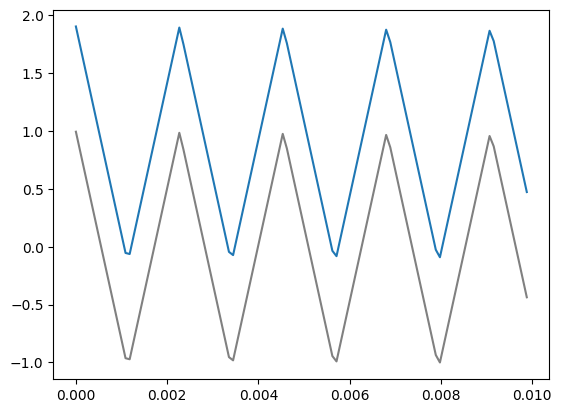

In [30]:
triangle_wave_spectrum.hs[0] = 100
triangle_signal_wave.plot(color='gray')
triangle_wave_spectrum.make_wave().plot()

Изменив компоненту нулевой частоты на 100, видно, что график сместился выше изначального.

# **Упражнение 2.5**
Напишите функцию, принимающую Spectrum как параметр и изменяющую его делением каждого элемента hs на соответсвующую частоту из fs. Подсказка: поскольку деление на ноль не определено, надо задать Spectrum.hs[0] = 0.

Проверьте эту функцию, используя прямоугольный, треугольный или пилообразный сигналы:

1. Вычислите Spectrum и распечатайте его.
2. Измените Spectrum, вновь используя свою функцию, и распечатайте его.
3. Используйте Spectrum.make_wave, чтобы сделать wave из измененного Spectrum, и прослушайте его. Как эта операция повлияла на сигнал?

Составим функцию:

In [31]:
def filter_spectrum(spectrum):
  spectrum.hs[1:] /= spectrum.fs[1:]
  spectrum.hs[0] = 0

1-й пункт из задания, используя треугольный сигнал:

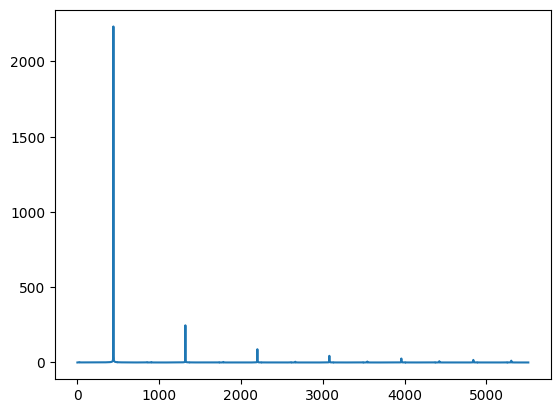

In [36]:
triangle_wave = TriangleSignal().make_wave(duration = 0.5)
triangle_spectrum = triangle_wave.make_spectrum()
triangle_spectrum.plot()
triangle_wave.make_audio()

Выполним 2-й и 3-й пункты:

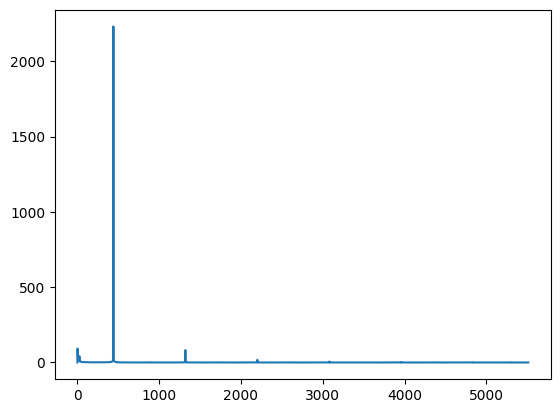

In [37]:
filter_spectrum(triangle_spectrum)
triangle_wave = triangle_spectrum.make_wave()
triangle_spectrum.scale(440)
triangle_spectrum.plot()
triangle_wave.make_audio()

Высокие частоты сильно срезались, но основные гармоники остались, только чем больше они по высоте, тем меньше влияют на сигнал.

# **Упражнение 2.6**
У треугольных и прямоугольных сигналов есть только нечентые гармоники; в пилообразном сигнале есть и четные, и нечетные гармоники. Гармоники прямоугольных и пилообразных сигналов уменьшаются пропорционально 1/f; гармоники треугольных сигналов - пропорционально 1/f^2. Можно ли найти сигнал, состоящий из четных и нечетных гармоник, совпадающих пропорционально 1/f^2?

Подсказка: для этого есть два способа. Можно собрать желаемый сигнал из синусоид, а можно взять сигнал со спектром похожим на необходимый, и изменять его параметры.

Возьмем пилообразный сигнал и поделим каждую амплитуду на герцовку, опираясь на Упражнение 2.5:

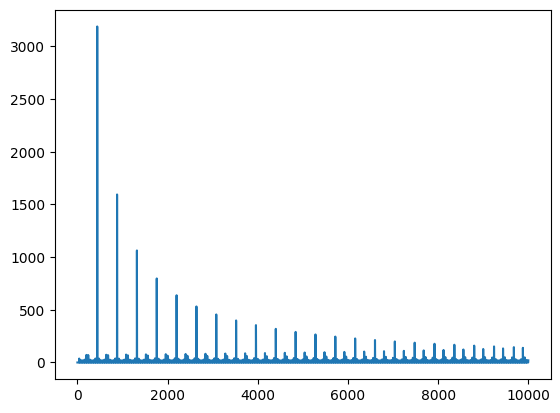

In [38]:
freq=440
sawtooth_signal = SawtoothSignal(freq=freq)
sawtooth_wave = sawtooth_signal.make_wave(duration = 0.5, framerate = 20000)
sawtooth_spectrum = sawtooth_wave.make_spectrum()
sawtooth_spectrum.plot()
sawtooth_wave.make_audio()

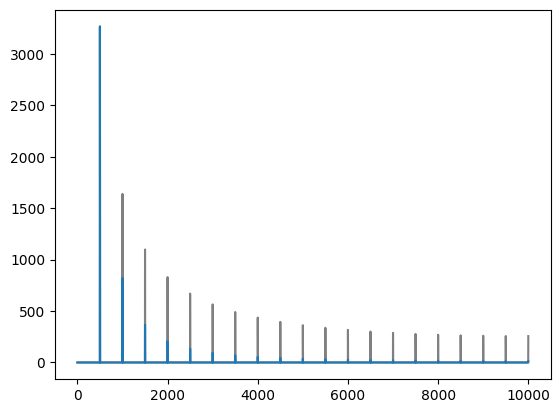

In [39]:
start_wave = SawtoothSignal(freq=500).make_wave(duration=0.5, framerate = 20000)
spectrum = start_wave.make_spectrum()
spectrum.plot(color='gray')
filter_spectrum(spectrum)
spectrum.scale(500)
spectrum.plot()

In [40]:
wave = spectrum.make_wave()
wave.make_audio()

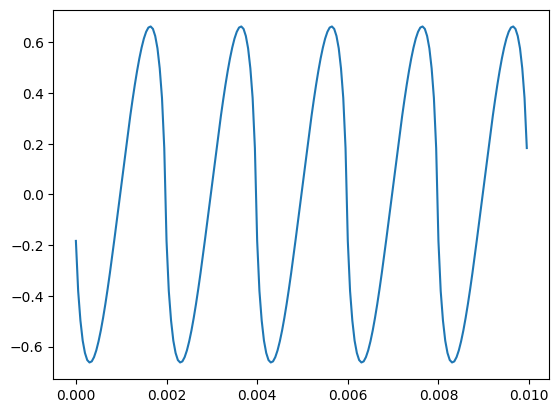

In [41]:
wave.segment(duration=0.01).plot()